In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np
from cycler import cycler
import re

import glob

%matplotlib inline

In [215]:
#Import style
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Futura Std',
    'font.style' : 'normal',
    'font.weight' : '100',
    'font.stretch' : 'ultra-condensed',
    
    'figure.facecolor'    : '#FDF6E3',

    
    'patch.antialiased'   : True,

    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',

    'axes.titlesize'      : 16,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f', '#86a3ba']),

    'axes.grid'           : False,
    'grid.color'          : '#ffffff',    # grid color
    'grid.linestyle'      : ':',         # line
    'grid.linewidth'      : 1,        # in points

    ### TICKS
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',

    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    
})

In [98]:
df = pd.read_csv("who_pays.csv")
df.head()

,description,details,money,pub_name
0,1200 word fiction,Medium reporting; Cold pitch (no pre existing ...,$0.02\n/word,3288 review
1,~1500 word profile or interview,Medium reporting; Ongoing/pre existing relatio...,$0.15\n/word,425 business
2,700 word feature,Medium reporting; Ongoing/pre existing relatio...,$0.21\n/word,5280
3,500 word news story,NaN,$0.07\n/word,7x7
4,2000 word profile or interview,Medium reporting; Cold pitch (no pre existing ...,$0.06\n/word,av club


In [ ]:
df[['rate','type']]=df.money.str.extract('\$(\d*.\d*)\\n/*(\w*)')

In [140]:
df['rate'] = df.rate.astype(float)

In [180]:
#Drop obvious miscategorizations
df.drop(df.index[[1822,860,583]], inplace=True)

In [160]:
#fill na's with 0
df.fillna(0)

,description,details,money,pub_name,rate,type
0,1200 word fiction,Medium reporting; Cold pitch (no pre existing ...,$0.02\n/word,3288 review,0.02,word
1,~1500 word profile or interview,Medium reporting; Ongoing/pre existing relatio...,$0.15\n/word,425 business,0.15,word
2,700 word feature,Medium reporting; Ongoing/pre existing relatio...,$0.21\n/word,5280,0.21,word
3,500 word news story,0,$0.07\n/word,7x7,0.07,word
4,2000 word profile or interview,Medium reporting; Cold pitch (no pre existing ...,$0.06\n/word,av club,0.06,word
5,700 word profile or interview,Medium reporting; Referral (you had a connecti...,$0.36\n/word,av club,0.36,word
6,"criticism, review, or arts/entertainment conve...",0,$60\nflat,av club,60.00,flat
7,1000 word profile or interview,Medium reporting; Ongoing/pre existing relatio...,$0.40\n/word,ae real crime blog,0.40,word
8,1000 word blog post,Medium reporting; Referral (you had a connecti...,$0.50\n/word,ae real crime blog,0.50,word
9,200 word fob,Heavy/Investigative reporting; Referral (you h...,$2.00\n/word,aarp bulletin,2.00,word


In [190]:
#drop all the zero values, including NAs 
df = df[df != 0.0]

In [88]:
# df.loc[df.money.str.contains("flat", na=False), "flat_rate"] = df.money.str.extract('\$(\d*.\d*)')
# df.loc[~df.money.str.contains("flat", na=False), "per_word"] = df.money.str.extract('\$(\d*.\d*)')

In [154]:
df.keys()

Index(['description', 'details', 'money', 'pub_name', 'rate', 'type'], dtype='object')

In [192]:
df_per = df[df['type'] != 'flat']

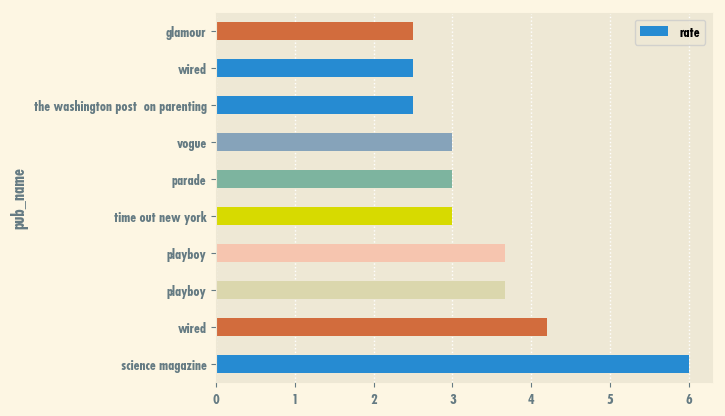

In [220]:
ax_rate = df_per.sort_values(by='rate', ascending=False).head(10).plot(kind='barh', x='pub_name', y='rate')
ax_rate.grid(True, axis='x')
plt.savefig('dist.svg')

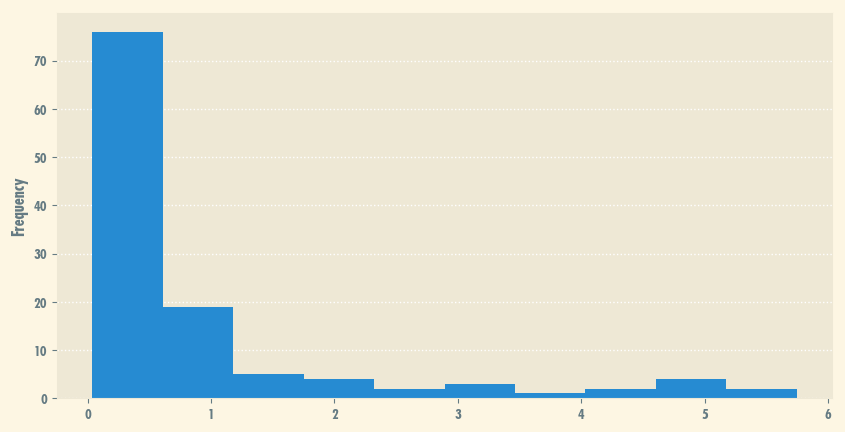

In [249]:
hist = df_per.rate.value_counts(normalize=True)*100
ax_hist = hist.plot(kind='hist', figsize=(10,5))
ax_hist.grid(True, axis='y')
plt.savefig('hist.svg')